In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten, Input
from sklearn.model_selection import ParameterGrid
import tensorflow as tf
import random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import os



<ipython-input-2-534447938504>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mercado_monthly = mercado.resample('M').sum()


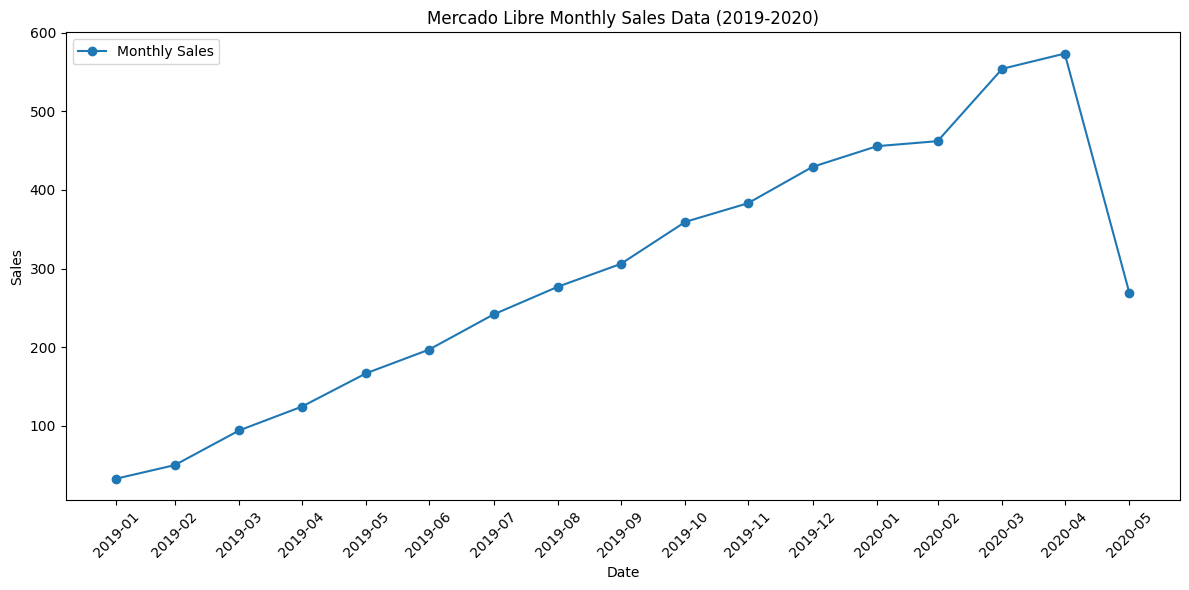

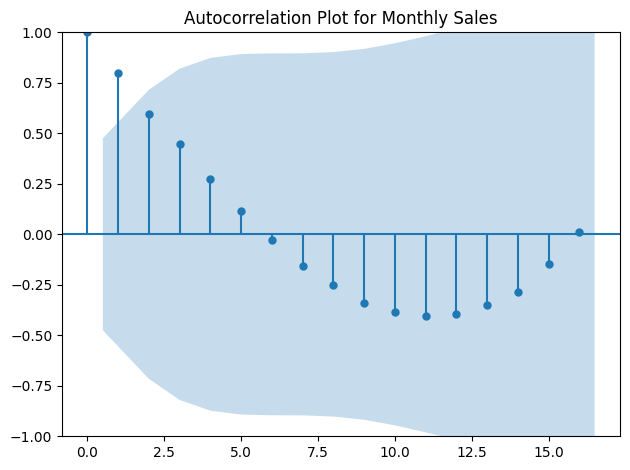

<Figure size 1200x1000 with 0 Axes>

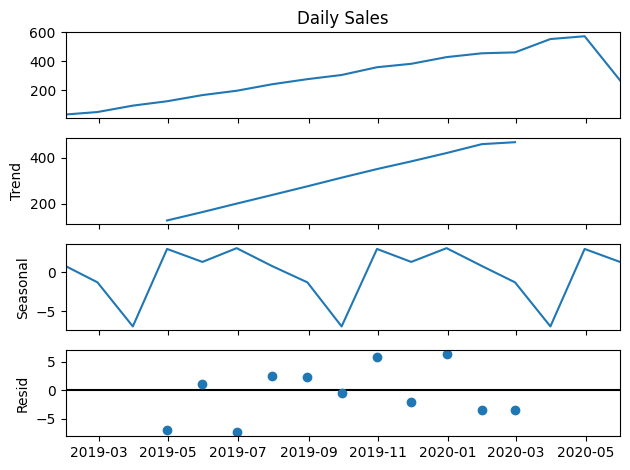

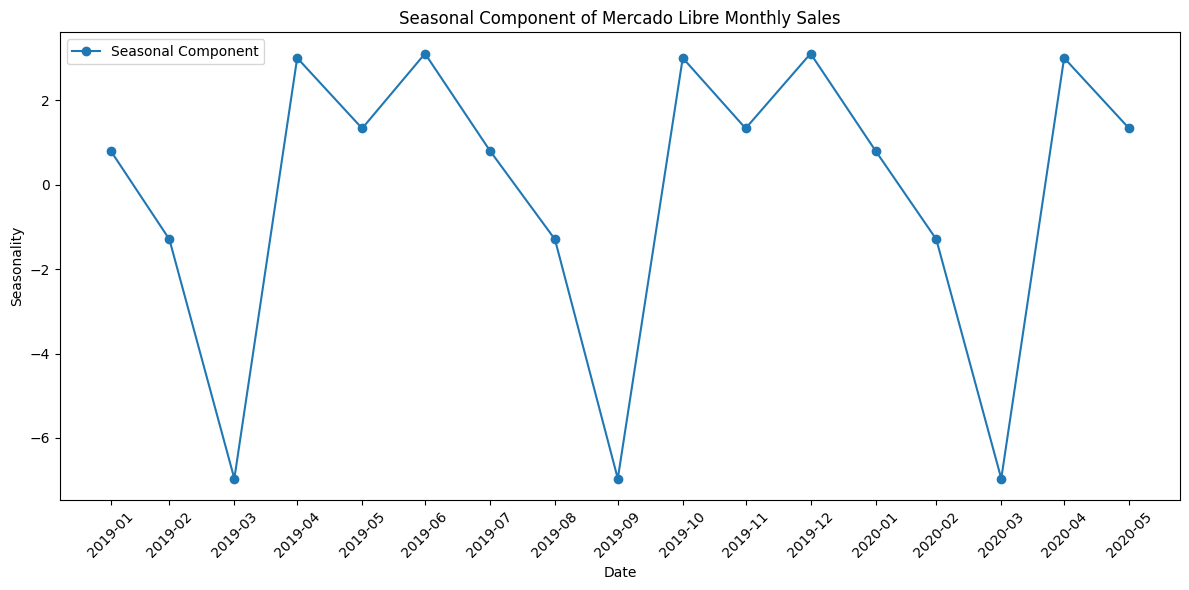

Seasonal Contribution to Variance: 0.04%
The data does not have a strong seasonal component.


In [2]:
# Load the data
mercado = pd.read_csv("mercado_libre.csv")
sales_column = 'Daily Sales'

# Convert 'date' column to datetime and set as index
mercado['date'] = pd.to_datetime(mercado['date'])
mercado.set_index('date', inplace=True)
mercado = mercado.sort_index()

# Aggregate the data into monthly sales
mercado_monthly = mercado.resample('M').sum()

# Step 1: Visualize the monthly sales data
plt.figure(figsize=(12, 6))
plt.plot(mercado_monthly[sales_column], label='Monthly Sales', marker='o')
plt.xticks(ticks=mercado_monthly.index, labels=mercado_monthly.index.strftime('%Y-%m'), rotation=45)
plt.title('Mercado Libre Monthly Sales Data (2019-2020)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Step 2: Autocorrelation plot for monthly sales
plot_acf(mercado_monthly[sales_column], lags=min(16, len(mercado_monthly[sales_column]) - 1))
plt.title('Autocorrelation Plot for Monthly Sales')
plt.tight_layout()
plt.show()

# Step 3: Seasonal decomposition with a shorter period (e.g., 6 months)
decomposition = seasonal_decompose(mercado_monthly[sales_column], model='additive', period=6)

# Plot the decomposition
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.tight_layout()
plt.show()

# Step 4: Extract and plot the seasonal component
seasonal = decomposition.seasonal
plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonal Component', marker='o')
plt.xticks(ticks=mercado_monthly.index, labels=mercado_monthly.index.strftime('%Y-%m'), rotation=45)
plt.title('Seasonal Component of Mercado Libre Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Calculate and analyze seasonal contribution to variance
seasonal_variance = np.var(seasonal.dropna())
total_variance = np.var(mercado_monthly[sales_column])
seasonal_contribution = seasonal_variance / total_variance

print(f'Seasonal Contribution to Variance: {seasonal_contribution * 100:.2f}%')

if seasonal_contribution > 0.1:
    print("The data has a significant seasonal component.")
else:
    print("The data does not have a strong seasonal component.")

Epoch 1/100
25/25 - 2s - 61ms/step - loss: 0.0618 - val_loss: 0.0072
Epoch 2/100
25/25 - 0s - 4ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 3/100
25/25 - 0s - 5ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 4/100
25/25 - 0s - 3ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 5/100
25/25 - 0s - 6ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 6/100
25/25 - 0s - 6ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/100
25/25 - 0s - 6ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
25/25 - 0s - 7ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/100
25/25 - 0s - 12ms/step - loss: 9.1440e-04 - val_loss: 0.0010
Epoch 10/100
25/25 - 0s - 11ms/step - loss: 8.7891e-04 - val_loss: 9.3885e-04
Epoch 11/100
25/25 - 0s - 6ms/step - loss: 8.4617e-04 - val_loss: 8.9371e-04
Epoch 12/100
25/25 - 0s - 6ms/step - loss: 8.1130e-04 - val_loss: 9.0385e-04
Epoch 13/100
25/25 - 0s - 5ms/step - loss: 7.7769e-04 - val_loss: 8.9494e-04
Epoch 14/100
25/25 - 0s - 6ms/step - loss: 7.4233e-04 - val_loss: 8.7360e

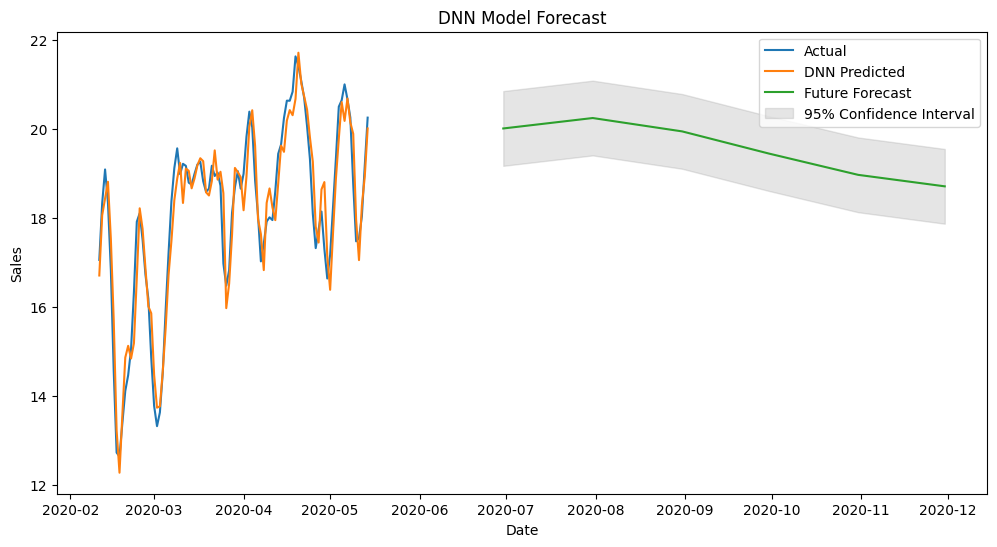

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


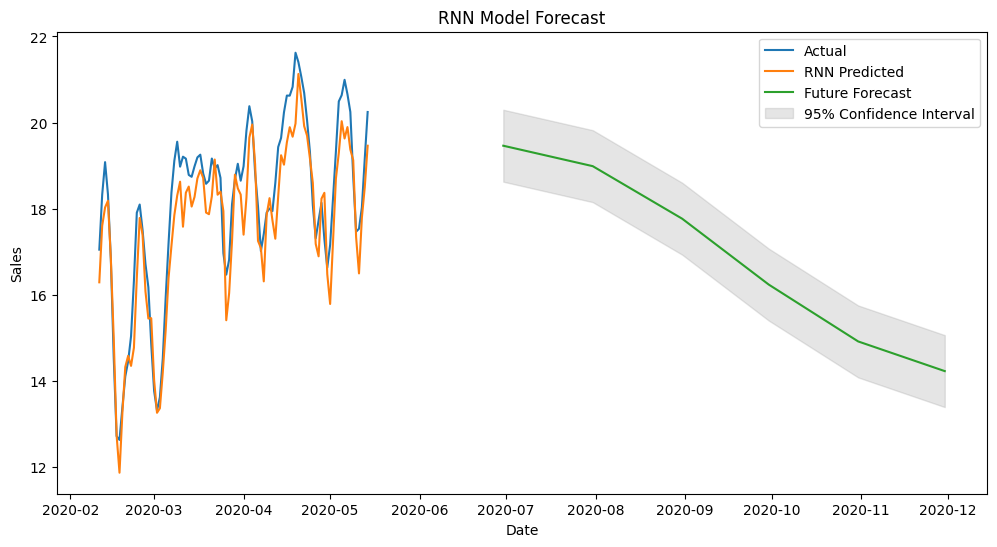

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


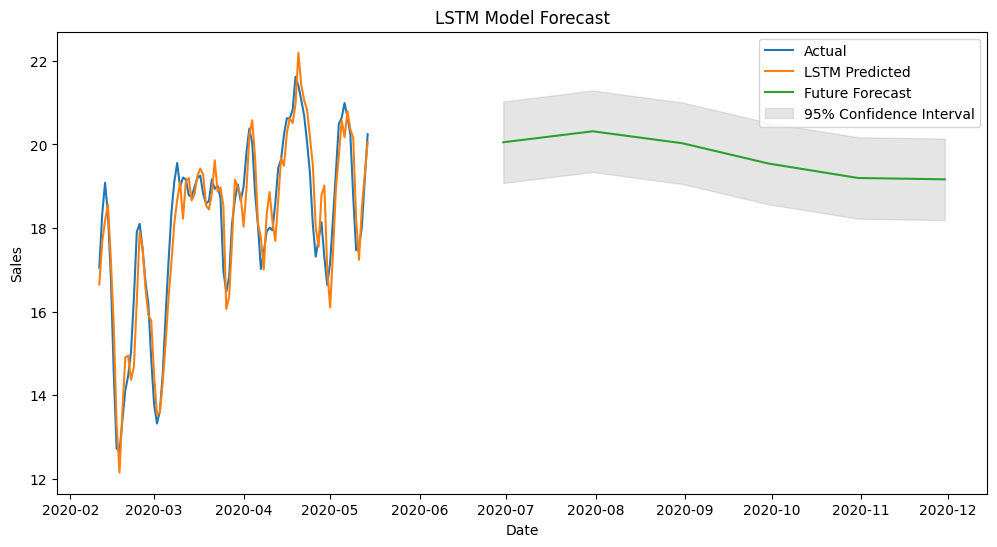

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


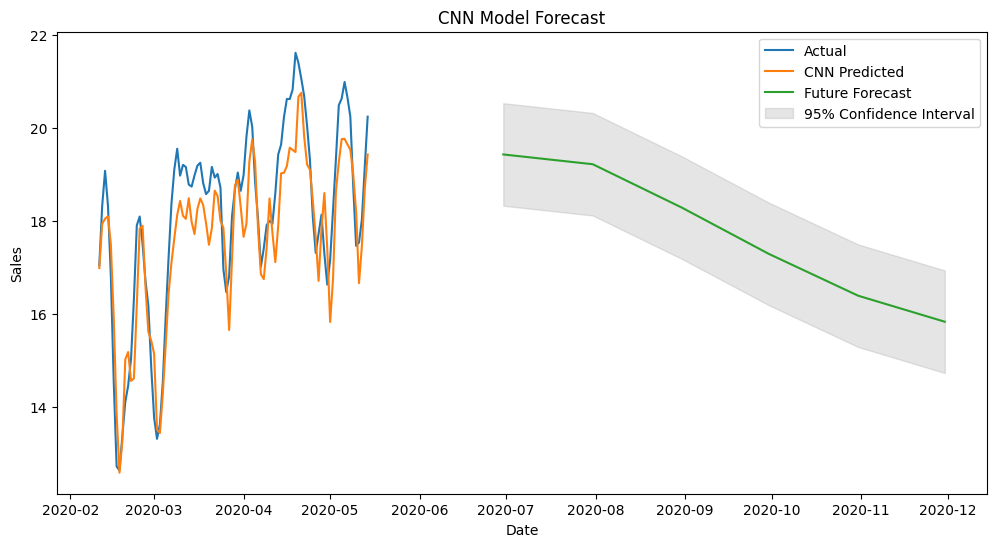

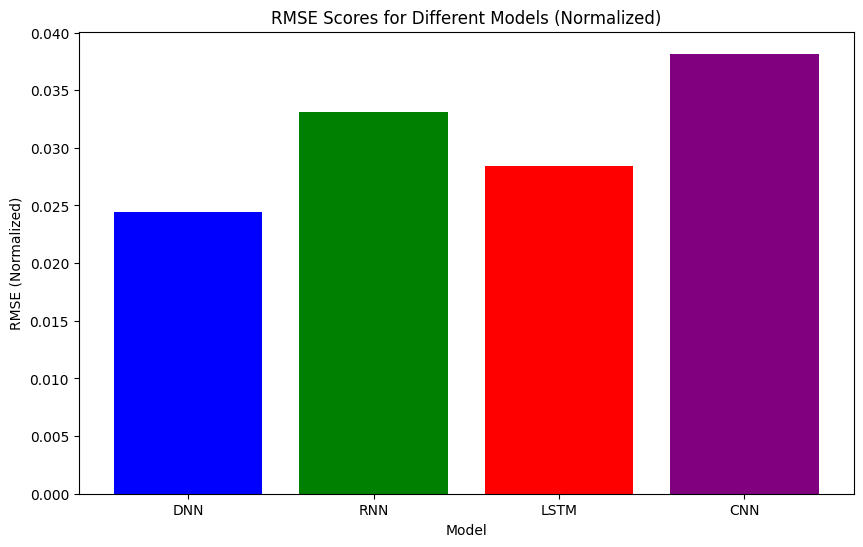

RMSE Scores (Normalized):
DNN: 0.024422334020444508
RNN: 0.03308517068405795
LSTM: 0.028399512356617983
CNN: 0.03816154555863497
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


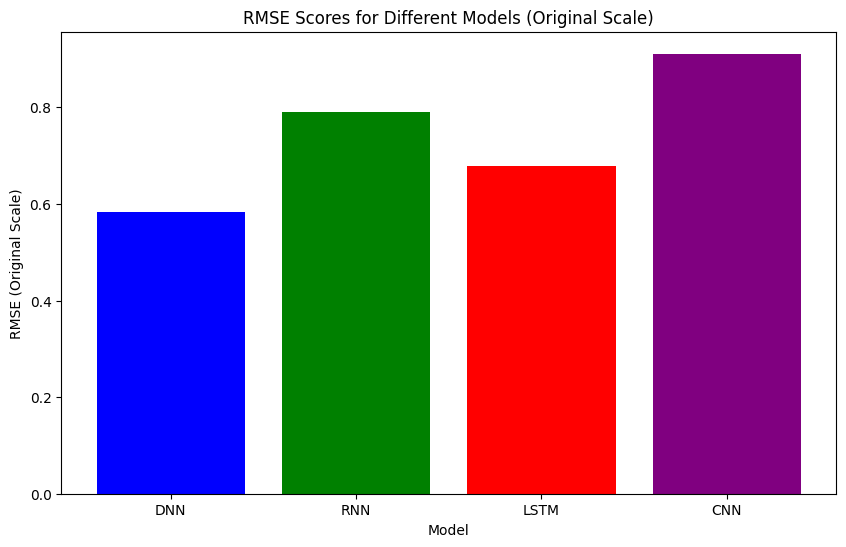

RMSE Scores (Original Scale):
DNN: 0.5829792602042715
RNN: 0.7897673826424766
LSTM: 0.6779174906311616
CNN: 0.9109443604501736

Future forecasted values with DNN (Original Scale):
2020-06: 20.00 (Lower Bound: 19.16, Upper Bound: 20.84)
2020-07: 20.24 (Lower Bound: 19.40, Upper Bound: 21.08)
2020-08: 19.94 (Lower Bound: 19.10, Upper Bound: 20.78)
2020-09: 19.44 (Lower Bound: 18.60, Upper Bound: 20.28)
2020-10: 18.96 (Lower Bound: 18.12, Upper Bound: 19.80)
2020-11: 18.70 (Lower Bound: 17.86, Upper Bound: 19.54)

Future forecasted values with RNN (Original Scale):
2020-06: 19.46 (Lower Bound: 18.63, Upper Bound: 20.30)
2020-07: 18.99 (Lower Bound: 18.15, Upper Bound: 19.82)
2020-08: 17.77 (Lower Bound: 16.93, Upper Bound: 18.60)
2020-09: 16.24 (Lower Bound: 15.41, Upper Bound: 17.08)
2020-10: 14.92 (Lower Bound: 14.09, Upper Bound: 15.76)
2020-11: 14.23 (Lower Bound: 13.40, Upper Bound: 15.07)

Future forecasted values with LSTM (Original Scale):
2020-06: 20.05 (Lower Bound: 19.08, Upper

In [3]:
# Function to reset random seeds
def reset_random_seeds():
    os.environ['PYTHONHASHSEED'] = str(2)
    tf.random.set_seed(2)
    np.random.seed(2)
    random.seed(2)


reset_random_seeds()

mercado = mercado.ffill().bfill()

# Normalize the data
scaler = MinMaxScaler()
mercado[sales_column] = scaler.fit_transform(mercado[[sales_column]])

# Prepare the data
train_size = int(0.8 * len(mercado))
train_data, test_data = mercado[sales_column][:train_size], mercado[sales_column][train_size:]

# Function to create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

seq_length = 6
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

# Reshape for RNN, LSTM, CNN (not needed for DNN)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


def build_dnn():
    model = Sequential()
    model.add(Input(shape=(seq_length,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def build_rnn():
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))
    model.add(SimpleRNN(50, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm():
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def build_cnn():
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and evaluate models
models = {
    'DNN': build_dnn(),
    'RNN': build_rnn(),
    'LSTM': build_lstm(),
    'CNN': build_cnn()
}

rmse_scores = {}
future_predictions = {}

# ORIG - 50,16
# AD - 150,48
# NL - 150,48
# RN - 300,32
# RL - 150,16

#for name, model in models.items():
#    if name == 'DNN':
#        model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), verbose=2)
#        y_pred = model.predict(X_test)
#    else:
#        model.fit(X_train_rnn, y_train, epochs=300, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=2)
#        y_pred = model.predict(X_test_rnn)

(''') # these code here is for OLR
for name, model in models.items():
    if name == 'DNN':
        model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)
        y_pred = model.predict(X_test)
    elif name == 'RNN':
        model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=2)
        y_pred = model.predict(X_test_rnn)
    elif name == 'LSTM':
        model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)
        y_pred = model.predict(X_test_lstm)
    elif name == 'CNN':
        model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=2)
        y_pred = model.predict(X_test_cnn)
(''')


for name, model in models.items():
    if name == 'DNN':
        model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)
        y_pred = model.predict(X_test)
    elif name == 'RNN':
        model.fit(X_train_rnn, y_train, epochs=100, batch_size=16, validation_data=(X_test_rnn, y_test), verbose=2)
        y_pred = model.predict(X_test_rnn)
    elif name == 'LSTM':
        model.fit(X_train_lstm, y_train, epochs=100, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=2)
        y_pred = model.predict(X_test_lstm)
    elif name == 'CNN':
        model.fit(X_train_cnn, y_train, epochs=100, batch_size=16, validation_data=(X_test_cnn, y_test), verbose=2)
        y_pred = model.predict(X_test_cnn)


    # Check for NaN or infinite values in y_test and y_pred
    print(f"Checking for NaN or infinite values in {name} predictions...")
    print(f"y_test: NaN values: {np.isnan(y_test).sum()}, Infinite values: {np.isinf(y_test).sum()}")
    print(f"y_pred: NaN values: {np.isnan(y_pred).sum()}, Infinite values: {np.isinf(y_pred).sum()}")

    if np.isnan(y_test).sum() > 0 or np.isinf(y_test).sum() > 0:
        raise ValueError(f"y_test contains NaN or infinite values.")
    if np.isnan(y_pred).sum() > 0 or np.isinf(y_pred).sum() > 0:
        raise ValueError(f"y_pred contains NaN or infinite values.")

    # Calculate RMSE for the test set predictions in normalized scale
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred.flatten()))
    rmse_scores[name] = rmse_test

    # Inverse transform the RMSE to the original scale
    rmse_test_original_scale = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(y_pred.reshape(-1, 1))))

    # Calculate residuals and standard deviation in normalized scale
    residuals = y_test - y_pred.flatten()
    std_error = np.std(residuals)

    # Calculate 95% confidence interval using z-score in normalized scale

    # 70% - 1.036
    # 75% - 1.15
    # 80% - 1.282
    # 85% - 1.44
    # 90% - 1.645
    # 95% - 1.96

    z_score = 1.44
    margin_error = z_score * std_error

    # Extend predictions for 1 year (12 MONTHSALESs) in normalized scale
    future_steps = 6
    if name == 'DNN':
        future_input = X_test[-1]
    else:
        future_input = X_test_rnn[-1]

    extended_predictions = []
    for i in range(future_steps):
        if name == 'DNN':
            future_pred = model.predict(np.expand_dims(future_input, axis=0))  # Predict the next value
            extended_predictions.append(future_pred[0, 0])  # Append the prediction to the list
            future_input = np.append(future_input[1:], future_pred)  # Update input sequence for next prediction
        else:
            future_pred = model.predict(np.expand_dims(future_input, axis=0))  # Predict the next value
            extended_predictions.append(future_pred[0, 0])  # Append the prediction to the list
            future_input = np.append(future_input[1:], future_pred, axis=0)  # Update input sequence for next prediction
            future_input = future_input.reshape(seq_length, 1)  # Ensure future_input has correct shape

    # Create a date range for future predictions
    last_date = mercado.index[-1]
    future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='ME')[1:]

    # Calculate upper and lower bounds in normalized scale
    upper_bound = np.array(extended_predictions) + margin_error
    lower_bound = np.array(extended_predictions) - margin_error

    # Inverse transform the future predictions and bounds to original scale
    extended_predictions_original_scale = scaler.inverse_transform(np.array(extended_predictions).reshape(-1, 1)).flatten()
    upper_bound_original_scale = scaler.inverse_transform(np.array(upper_bound).reshape(-1, 1)).flatten()
    lower_bound_original_scale = scaler.inverse_transform(np.array(lower_bound).reshape(-1, 1)).flatten()

    future_predictions[name] = (future_dates, extended_predictions_original_scale, upper_bound_original_scale, lower_bound_original_scale)

    print(f"{name} Test RMSE in normalized scale: {rmse_test}")
    print(f"{name} Test RMSE in original scale: {rmse_test_original_scale}")

# Plot the results
for name, model in models.items():
    if name == 'DNN':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_rnn)

    future_dates, extended_predictions_original_scale, upper_bound_original_scale, lower_bound_original_scale = future_predictions[name]

    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index[seq_length:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(test_data.index[seq_length:], scaler.inverse_transform(y_pred), label=f'{name} Predicted')
    plt.plot(future_dates, extended_predictions_original_scale, label='Future Forecast')
    plt.fill_between(future_dates, lower_bound_original_scale, upper_bound_original_scale, color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'{name} Model Forecast')
    plt.legend()
    plt.show()

# Plot RMSE Scores
model_names = list(rmse_scores.keys())
rmse_values = list(rmse_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('RMSE (Normalized)')
plt.title('RMSE Scores for Different Models (Normalized)')
plt.show()

print("RMSE Scores (Normalized):")
for model_name, rmse_score in rmse_scores.items():
    print(f"{model_name}: {rmse_score}")

# Plot RMSE Scores in original scale
model_names = list(rmse_scores.keys())
rmse_values_original = [np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(models[model_name].predict(X_test).reshape(-1, 1)))) if model_name == 'DNN' else np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(models[model_name].predict(X_test_rnn).reshape(-1, 1)))) for model_name in model_names]

plt.figure(figsize=(10, 6))
plt. bar(model_names, rmse_values_original, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('RMSE (Original Scale)')
plt.title('RMSE Scores for Different Models (Original Scale)')
plt.show()

print("RMSE Scores (Original Scale):")
for model_name, rmse_score in zip(model_names, rmse_values_original):
    print(f"{model_name}: {rmse_score}")

# Print all future forecasted values with dates in original scale
for name, (future_dates, extended_predictions_original_scale, upper_bound_original_scale, lower_bound_original_scale) in future_predictions.items():
    print(f"\nFuture forecasted values with {name} (Original Scale):")
    for date, value, lb, ub in zip(future_dates, extended_predictions_original_scale, lower_bound_original_scale, upper_bound_original_scale):
        print(f"{date.strftime('%Y-%m')}: {value:.2f} (Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f})")